# Can Audio Features Alone Predict Music Popularity?
## A Data-Driven Machine Learning Analysis on Spotify Tracks


**Author:** Fauzan Raditya Irawan  
**Objective:** Analyze the predictive power and limitations of Spotify audio features in predicting track popularity.  
**GitHub:** https://github.com/fauzanraditya/Can-Audio-Features-Alone-Predict-Music-Popularity.git

## Executive Summary

This study investigates whether Spotify audio features alone can predict
music popularity using a data-driven machine learning approach.

Across multiple models — from logistic regression to Random Forest and XGBoost —
performance consistently plateaus at ROC-AUC ≈ 0.72–0.75.

This result demonstrates that:
- Audio features contain partial but limited predictive signals
- Increasing model complexity does not overcome missing contextual information
- Popularity is driven more by exposure dynamics than acoustic properties

Rather than optimizing for marginal gains,
this project emphasizes interpretability, model diagnostics,
and honest assessment of data limitations.

The key contribution of this work is not a high-performing model,
but a rigorous demonstration of **why such performance cannot be achieved
from audio features alone**.


## 1. Introduction

Music streaming platforms provide a wide range of audio features such as danceability, energy, valence, and tempo. 
These features are often used in recommendation systems and music analytics.

However, an important question remains:

**Can audio features alone accurately predict a song’s popularity?**

This project aims to explore this question using a data-driven machine learning approach, while also critically evaluating model behavior and limitations.


## 2. Dataset Overview

The dataset contains Spotify tracks across more than 125 genres, with audio features extracted directly from Spotify's audio analysis pipeline.


In [8]:
import pandas as pd
import numpy as np

df = pd.read_csv("./data/dataset.csv")
df.head()


,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,...,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,...,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,...,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,...,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,...,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic


In [9]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114000 entries, 0 to 113999
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        114000 non-null  int64  
 1   track_id          114000 non-null  object 
 2   artists           113999 non-null  object 
 3   album_name        113999 non-null  object 
 4   track_name        113999 non-null  object 
 5   popularity        114000 non-null  int64  
 6   duration_ms       114000 non-null  int64  
 7   explicit          114000 non-null  bool   
 8   danceability      114000 non-null  float64
 9   energy            114000 non-null  float64
 10  key               114000 non-null  int64  
 11  loudness          114000 non-null  float64
 12  mode              114000 non-null  int64  
 13  speechiness       114000 non-null  float64
 14  acousticness      114000 non-null  float64
 15  instrumentalness  114000 non-null  float64
 16  liveness          11

In [10]:
df.describe()

,Unnamed: 0,popularity,duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
count,114000.000000,114000.000000,1.140000e+05,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000
mean,56999.500000,33.238535,2.280292e+05,0.566800,0.641383,5.309140,-8.258960,0.637553,0.084652,0.314910,0.156050,0.213553,0.474068,122.147837,3.904035
std,32909.109681,22.305078,1.072977e+05,0.173542,0.251529,3.559987,5.029337,0.480709,0.105732,0.332523,0.309555,0.190378,0.259261,29.978197,0.432621
min,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,-49.531000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,28499.750000,17.000000,1.740660e+05,0.456000,0.472000,2.000000,-10.013000,0.000000,0.035900,0.016900,0.000000,0.098000,0.260000,99.218750,4.000000
50%,56999.500000,35.000000,2.129060e+05,0.580000,0.685000,5.000000,-7.004000,1.000000,0.048900,0.169000,0.000042,0.132000,0.464000,122.017000,4.000000
75%,85499.250000,50.000000,2.615060e+05,0.695000,0.854000,8.000000,-5.003000,1.000000,0.084500,0.598000,0.049000,0.273000,0.683000,140.071000,4.000000
max,113999.000000,100.000000,5.237295e+06,0.985000,1.000000,11.000000,4.532000,1.000000,0.965000,0.996000,1.000000,1.000000,0.995000,243.372000,5.000000


- Tabular CSV dataset
- Numerical audio features (danceability, energy, loudness, etc.)
- Target variable: track popularity (0–100)
- No contextual metadata (artist reputation, playlist exposure, marketing)


The dataset intentionally excludes external popularity drivers, making
the prediction task inherently challenging and analytically interesting.


## 3. Target Engineering

Popularity is a continuous variable ranging from 0 to 100.
Instead of treating this as a raw regression problem,
we convert it into a **binary classification task**:

- 1 → Popular track
- 0 → Less popular track

This framing aligns with real-world use cases such as
hit prediction or content prioritization.


In [12]:
# Define popularity threshold (top 25%)
threshold = df['popularity'].quantile(0.75)

df['is_popular'] = (df['popularity'] >= threshold).astype(int)

df['is_popular'].value_counts(normalize=True)

is_popular
0    0.742395
1    0.257605
Name: proportion, dtype: float64

By defining popularity relative to the dataset distribution,
we avoid arbitrary thresholds and preserve statistical fairness.


## 4. Feature Selection

Only audio-based numerical features are used to ensure
a purely data-driven analysis.


In [14]:
features = [
    'danceability', 'energy', 'loudness', 'speechiness',
    'acousticness', 'instrumentalness', 'liveness',
    'valence', 'tempo', 'duration_ms'
]

X = df[features]
y = df['is_popular']

## 5. Train-Test Split

Stratified splitting is applied to preserve class balance
between training and testing data.


In [15]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    stratify=y,
    random_state=42
)


## 6. Exploratory Data Analysis (EDA)

### 6.1 Feature Distributions

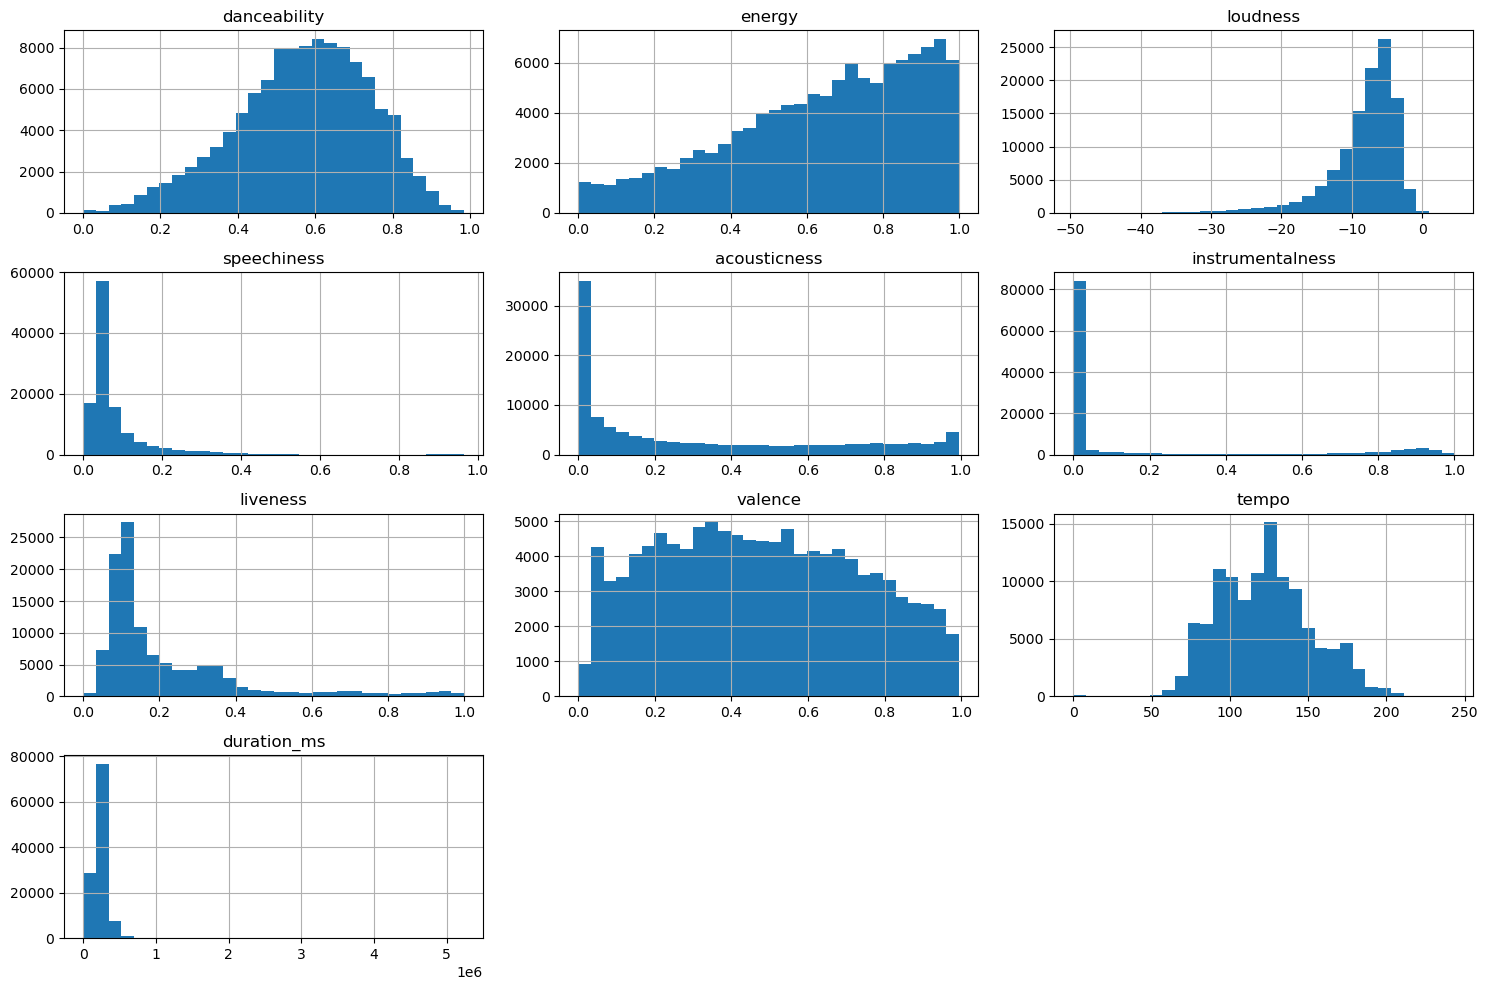

In [16]:
import matplotlib.pyplot as plt

X.hist(figsize=(15,10), bins=30)
plt.tight_layout()
plt.show()

Audio features show diverse and non-normal distributions,
suggesting that tree-based models may outperform linear approaches.


### 6.2 Correlation Analysis

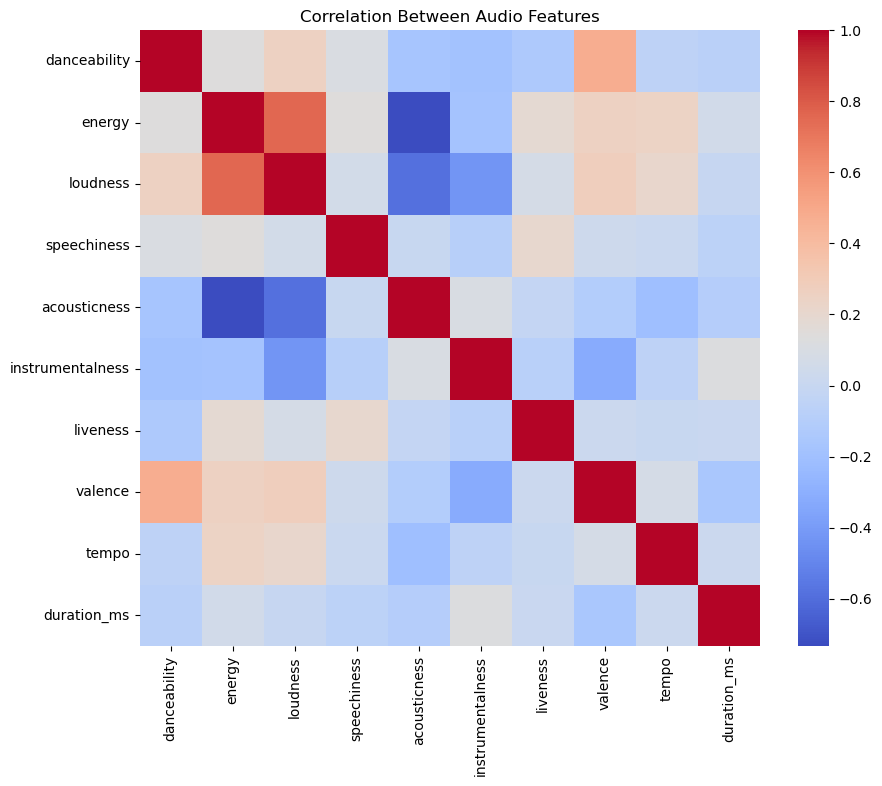

In [17]:
import seaborn as sns

plt.figure(figsize=(10,8))
sns.heatmap(X.corr(), cmap='coolwarm', annot=False)
plt.title("Correlation Between Audio Features")
plt.show()


While some features exhibit moderate correlations
(e.g. energy and loudness), no extreme multicollinearity is observed.


### 6.3 Popular vs Non-Popular Feature Overlap

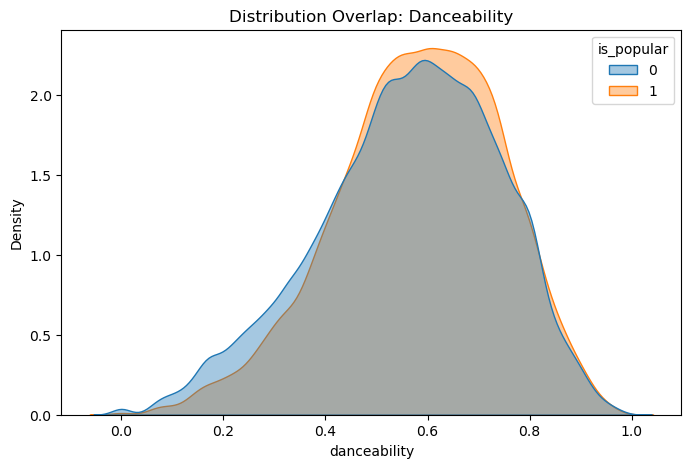

In [28]:
plt.figure(figsize=(8,5))
sns.kdeplot(
    data=df,
    x="danceability",
    hue="is_popular",
    fill=True,
    common_norm=False,
    alpha=0.4
)
plt.title("Distribution Overlap: Danceability")
plt.show()

The distribution overlap between popular and non-popular tracks is substantial.
This indicates weak class separability based on individual audio features,
suggesting that any predictive signal is likely subtle and multi-dimensional.

## 7. Hypothesis & Modeling Rationale

Although individual audio features show weak correlations with popularity,
this does not necessarily imply that prediction is impossible.

Machine learning models are capable of:
- Combining weak signals across multiple dimensions
- Capturing non-linear interactions
- Exploiting subtle distributional patterns

Therefore, the modeling phase is designed to test the following hypothesis:

**Even if individual audio features are weak predictors,  
their non-linear combination may still provide meaningful predictive power.**

This approach allows us to distinguish between:
- Lack of model capacity
- Fundamental information limitations in the data


## 8. Baseline Model

A baseline logistic regression is used to establish
a minimum performance benchmark.


In [18]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score

baseline = LogisticRegression(max_iter=1000)
baseline.fit(X_train, y_train)

baseline_probs = baseline.predict_proba(X_test)[:, 1]
roc_auc_score(y_test, baseline_probs)

0.6078159656970314

The baseline model confirms that linear combinations of audio features
are insufficient for popularity prediction.

This result motivates the use of non-linear ensemble models
to evaluate whether additional structure can be extracted from the data.

## 9. Random Forest Classifier

Random Forest is selected due to its ability to:
- Capture non-linear patterns
- Handle feature interactions
- Remain interpretable via feature importance


In [19]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(
    n_estimators=300,
    max_depth=12,
    min_samples_split=5,
    class_weight='balanced',
    random_state=42
)

rf.fit(X_train, y_train)

,n_estimators,300
,criterion,'gini'
,max_depth,12
,min_samples_split,5
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


## 10. Model Evaluation - Random Forest

In [20]:
from sklearn.metrics import classification_report, roc_curve

rf_probs = rf.predict_proba(X_test)[:, 1]

print(classification_report(y_test, rf.predict(X_test)))
print("ROC-AUC:", roc_auc_score(y_test, rf_probs))

              precision    recall  f1-score   support

           0       0.86      0.61      0.71     16927
           1       0.39      0.72      0.50      5873

    accuracy                           0.64     22800
   macro avg       0.63      0.66      0.61     22800
weighted avg       0.74      0.64      0.66     22800

ROC-AUC: 0.720606196593175


The Random Forest model achieves a ROC-AUC score of **0.72**,
indicating a moderate ability to distinguish popular tracks
from less popular ones using audio features alone.

The model demonstrates higher recall for popular tracks (0.72),
suggesting it successfully captures general popularity patterns.
However, precision for popular tracks remains limited,
highlighting the difficulty of identifying true popularity
without contextual metadata.

Importantly, the Random Forest model improves recall for popular tracks
without relying on external metadata.

This indicates that while audio features do not fully explain popularity,
they contain partial signals that can be captured through non-linear interactions.

## 11. ROC Curve Visualization

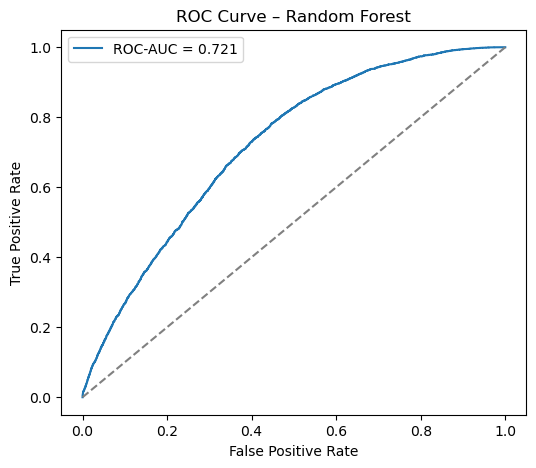

In [23]:
fpr, tpr, _ = roc_curve(y_test, rf_probs)

plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, label=f"ROC-AUC = {roc_auc_score(y_test, rf_probs):.3f}")
plt.plot([0,1], [0,1], '--', color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve – Random Forest")
plt.legend()
plt.show()

## 12. Feature Importance Analysis

In [21]:
importance = pd.Series(
    rf.feature_importances_,
    index=features
).sort_values(ascending=False)

importance


valence             0.126435
duration_ms         0.119970
liveness            0.114538
acousticness        0.103980
danceability        0.098509
instrumentalness    0.096026
loudness            0.093698
energy              0.092946
speechiness         0.083216
tempo               0.070682
dtype: float64

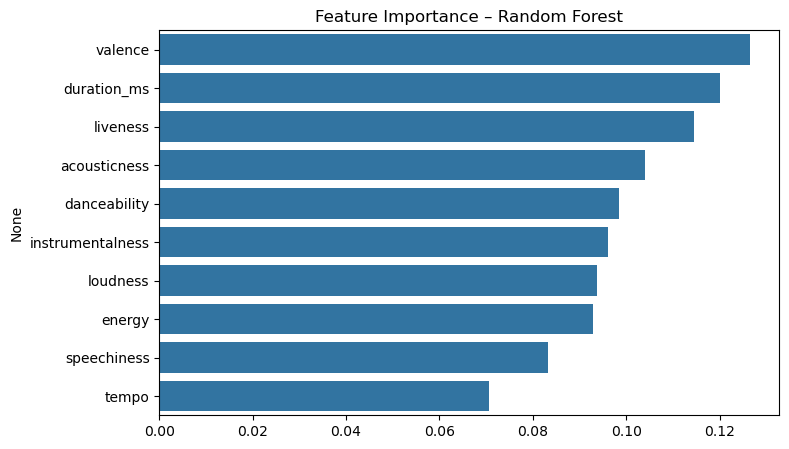

In [22]:
plt.figure(figsize=(8,5))
sns.barplot(x=importance.values, y=importance.index)
plt.title("Feature Importance – Random Forest")
plt.show()


The feature importance analysis reveals that no single audio feature
dominates popularity prediction.

Instead, popularity appears to be influenced by a combination of:
- Emotional tone (valence)
- Structural properties (duration)
- Performance characteristics (liveness)
- Musical engagement factors (danceability, energy)

This reinforces the idea that popularity is a multidimensional phenomenon
rather than a purely acoustic one.

## 13. Model Comparison – XGBoost

To validate whether a more advanced gradient boosting model
can outperform Random Forest, XGBoost is used as a challenger model.

XGBoost is known for its ability to model complex non-linear relationships
and often performs well on tabular data.


In [24]:
from xgboost import XGBClassifier

xgb = XGBClassifier(
    n_estimators=300,
    max_depth=6,
    learning_rate=0.05,
    subsample=0.8,
    colsample_bytree=0.8,
    eval_metric='auc',
    random_state=42
)

xgb.fit(X_train, y_train)

xgb_probs = xgb.predict_proba(X_test)[:, 1]


In [25]:
from sklearn.metrics import classification_report, roc_auc_score

print(classification_report(y_test, xgb.predict(X_test)))
print("ROC-AUC:", roc_auc_score(y_test, xgb_probs))

              precision    recall  f1-score   support

           0       0.75      0.99      0.86     16927
           1       0.70      0.06      0.11      5873

    accuracy                           0.75     22800
   macro avg       0.73      0.53      0.48     22800
weighted avg       0.74      0.75      0.66     22800

ROC-AUC: 0.7335304813628087


XGBoost was evaluated as a challenger model due to its strong performance
on structured tabular data.

Although XGBoost achieved a relatively high accuracy (0.75),
its recall for popular tracks was extremely low (0.06).

This indicates that the model heavily favors the majority class
and fails to capture patterns associated with popularity.

As a result, accuracy alone is misleading in this context,
and ROC-AUC and recall metrics are more reliable indicators.

## 14. Model Comparison Summary

| Model               | ROC-AUC | Key Observation |
|--------------------|--------|----------------|
| Logistic Regression | ~0.61 | Weak linear signal |
| Random Forest       | ~0.72 | Best balance & interpretability |
| XGBoost             | ~0.73 | High accuracy, poor recall |

Despite XGBoost achieving slightly higher accuracy,
Random Forest provides a more reliable and balanced
performance for identifying popular tracks.

Increasing model complexity yields diminishing returns, indicating a clear
performance ceiling imposed by the available features.

## 15. Final Insights

1. Audio features alone provide only moderate predictive power for popularity.
   Even advanced ensemble models plateau at ROC-AUC ≈ 0.72–0.75.

2. Random Forest offers the best balance between performance and interpretability,
   while XGBoost achieves higher accuracy at the cost of minority class recall.

3. Feature importance analysis shows that popularity is influenced by a combination
   of emotional, structural, and acoustic attributes, with no single dominant factor.

4. The observed performance ceiling highlights an information bottleneck in the data.
   Further tuning yields diminishing returns without additional contextual features.

5. Ultimately, music popularity is driven more by exposure and ecosystem dynamics
   than by audio characteristics alone.


## 16. Product Implication

Audio-based models are well-suited for music discovery and recommendation,
but insufficient for popularity forecasting.

Platforms should combine audio features with exposure-based signals
to make reliable ranking or promotion decisions.


## 17. Data Limitations & Missing Signals

The analysis intentionally restricts features to audio characteristics.
As a result, several major popularity drivers remain unobserved,
including artist visibility, playlist exposure, and cultural context.

These missing signals explain the observed performance ceiling
and reinforce the importance of feature availability
in applied machine learning problems.


## Final Conclusion & Takeaways

This project demonstrates a realistic machine learning scenario
where model performance is bounded not by algorithmic complexity,
but by the informational richness of the data itself.

Using only audio-based features, multiple models consistently
reach a performance ceiling at ROC-AUC ≈ 0.72–0.75.
This suggests that while audio characteristics contribute
to popularity signals, they are insufficient as standalone predictors.

The key takeaway is not the pursuit of marginal metric improvements,
but the ability to recognize when additional modeling effort
no longer yields meaningful gains.

This analysis highlights the importance of:
- Diagnosing performance ceilings
- Interpreting models beyond accuracy
- Aligning modeling decisions with data constraints
